# Purpose:
- To check GFP+ samples from Scl32a1;Oi1
- From Xenium data
    - Already mapped to WMB taxonomy

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_fn = Path('//allen/programs/mindscope/workgroups/learning/jinho/mfish/zstack_cells_coreg.csv')
data = pd.read_csv(data_fn)

In [11]:
annotation_columns = ['class_name',
 'subclass_name',
 'supertype_name',
 'cluster_name',
 'class_name_short',
 'subclass_name_short',
 'Type',]

anno = data[annotation_columns]

In [15]:
anno.Type.unique()

array(['non-neuronal', 'inhibitory', 'excitatory'], dtype=object)

In [25]:
data.groupby('class_name').size().sort_values(ascending=False)

class_name
01 IT-ET Glut        7504
33 Vascular          1755
30 Astro-Epen        1715
06 CTX-CGE GABA       532
07 CTX-MGE GABA       304
34 Immune             255
31 OPC-Oligo          174
05 OB-IMN GABA         71
04 DG-IMN Glut         17
24 MY Glut             16
09 CNU-LGE GABA        14
02 NP-CT-L6b Glut      12
11 CNU-HYa GABA        11
12 HY GABA             11
27 MY GABA             10
25 Pineal Glut         10
19 MB Glut             10
18 TH Glut              8
23 P Glut               7
20 MB GABA              7
10 LSX GABA             7
32 OEC                  5
26 P GABA               4
13 CNU-HYa Glut         4
03 OB-CR Glut           4
08 CNU-MGE GABA         3
17 MH-LH Glut           2
16 HY MM Glut           2
28 CB GABA              1
21 MB Dopa              1
dtype: int64

In [27]:
cortical_class_labels = data.groupby('class_name').size().sort_values(ascending=False)[:7].index.values
cortical_data = data[data.class_name.isin(cortical_class_labels)]

In [30]:
cortical_data.groupby('Type').size()

Type
excitatory      7504
inhibitory       836
non-neuronal    3899
dtype: int64

In [34]:
cortical_data.columns[cortical_data.columns.str.contains('EGFP')]

Index(['EGFP', 'pHaloTag-EGFP'], dtype='object')

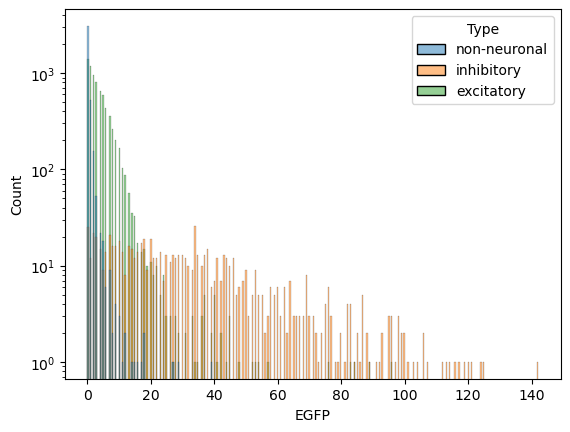

In [37]:
fig, ax = plt.subplots()
sns.histplot(data=cortical_data, x='EGFP', hue='Type', ax=ax)
ax.set_yscale('log')

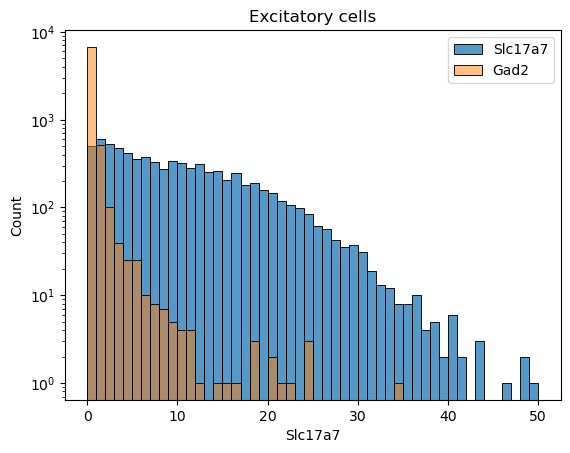

In [47]:
fig, ax = plt.subplots()
sns.histplot(data=cortical_data.query('Type=="excitatory"'), x='Slc17a7', ax=ax, label='Slc17a7', bins=np.arange(0, 51))
sns.histplot(data=cortical_data.query('Type=="excitatory"'), x='Gad2', ax=ax, label='Gad2', bins=np.arange(0, 51), alpha=0.5)
ax.legend()
ax.set_title('Excitatory cells')
ax.set_yscale('log')

Text(0.5, 1.0, 'Excitatory cells')

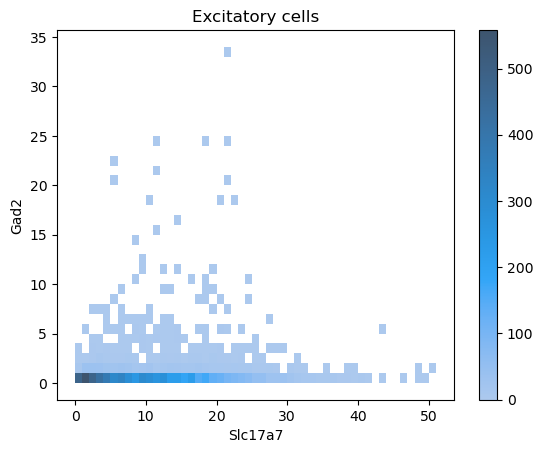

In [65]:
fig, ax = plt.subplots()
sns.histplot(cortical_data.query('Type=="excitatory"'), x='Slc17a7', y='Gad2', ax=ax,
cbar=True, binwidth=(1,1))
ax.set_title('Excitatory cells')


Text(0.5, 1.0, 'Inhibitory cells')

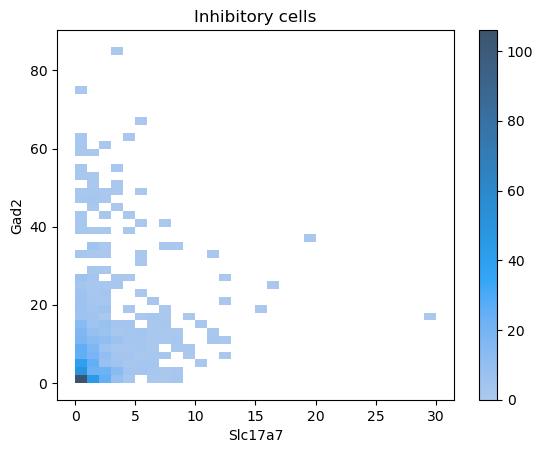

In [64]:
fig, ax = plt.subplots()
sns.histplot(cortical_data.query('Type=="inhibitory"'), x='Slc17a7', y='Gad2', ax=ax,
cbar=True, binwidth=(1,2))
ax.set_title('Inhibitory cells')


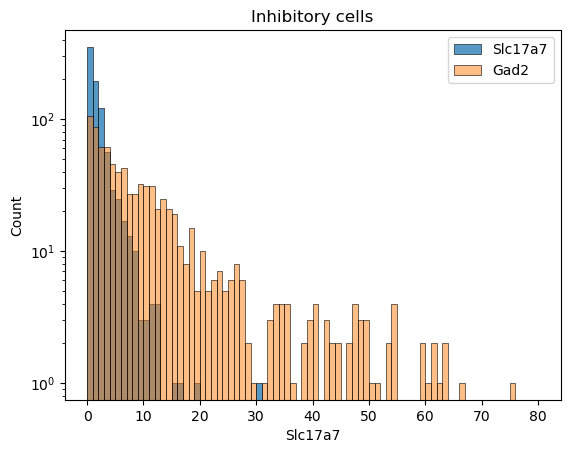

In [50]:
fig, ax = plt.subplots()
sns.histplot(data=cortical_data.query('Type=="inhibitory"'), x='Slc17a7', ax=ax, label='Slc17a7', bins=np.arange(0, 81))
sns.histplot(data=cortical_data.query('Type=="inhibitory"'), x='Gad2', ax=ax, label='Gad2', bins=np.arange(0, 81), alpha=0.5)
ax.legend()
ax.set_title('Inhibitory cells')
ax.set_yscale('log')


In [81]:
data.columns[20:50]

Index(['z_zstack', 'x_affine', 'y_affine', 'z_affine', 'x_warped', 'y_warped',
       'z_warped', 'label_value', 'x_warped_', 'y_warped_', 'z_warped_',
       'class_name', 'subclass_name', 'supertype_name', 'cluster_name',
       'class_name_short', 'subclass_name_short', 'Type', '2010300C02Rik',
       'Acsbg1', 'Acta2', 'Acvrl1', 'Adamts2', 'Adamtsl1', 'Adcyap1', 'Adgrl4',
       'Aldh1a2', 'Angpt1', 'Ano1', 'Aqp4'],
      dtype='object')

In [72]:
cortical_data.query('Type=="excitatory" and EGFP>0').groupby('cluster_name').size().sort_values(ascending=False)

cluster_name
0111 L2/3 IT CTX Glut_2         1551
0109 L2/3 IT CTX Glut_2         1348
0082 L4/5 IT CTX Glut_2         1047
0110 L2/3 IT CTX Glut_2          954
0118 L2/3 IT CTX Glut_4          491
                                ... 
0146 L2/3 IT PIR-ENTl Glut_2       1
0148 L2/3 IT PIR-ENTl Glut_2       1
0166 IT AON-TT-DP Glut_1           1
0183 IT AON-TT-DP Glut_5           1
0401 CA2-FC-IG Glut_2              1
Length: 77, dtype: int64

In [84]:
cortical_data.subclass_name.unique()

array(['329 ABC NN', '330 VLMC NN', '319 Astro-TE NN', '333 Endo NN',
       '332 SMC NN', '335 BAM NN', '337 DC NN', '321 Astroependymal NN',
       '338 Lymphoid NN', '049 Lamp5 Gaba', '327 Oligo NN', '331 Peri NN',
       '326 OPC NN', '334 Microglia NN', '318 Astro-NT NN',
       '046 Vip Gaba', '007 L2/3 IT CTX Glut', '047 Sncg Gaba',
       '048 RHP-COA Ndnf Gaba', '004 L6 IT CTX Glut', '323 Ependymal NN',
       '006 L4/5 IT CTX Glut', '019 L2/3 IT PPP Glut', '322 Tanycyte NN',
       '320 Astro-OLF NN', '001 CLA-EPd-CTX Car3 Glut',
       '050 Lamp5 Lhx6 Gaba', '016 CA1-ProS Glut',
       '009 L2/3 IT PIR-ENTl Glut', '005 L5 IT CTX Glut',
       '003 L5/6 IT TPE-ENT Glut', '336 Monocytes NN',
       '020 L2/3 IT RSP Glut', '316 Bergmann NN', '053 Sst Gaba',
       '017 CA3 Glut', '018 L2 IT PPP-APr Glut', '010 IT AON-TT-DP Glut',
       '015 ENTmv-PA-COAp Glut', '021 L4 RSP-ACA Glut',
       '013 COAp Grxcr2 Glut', '051 Pvalb chandelier Gaba',
       '052 Pvalb Gaba', '022 L5 E

In [85]:
cortical_data.query('Type=="inhibitory" and EGFP==0').groupby('subclass_name').size().sort_values(ascending=False)

subclass_name
046 Vip Gaba             6
052 Pvalb Gaba           5
048 RHP-COA Ndnf Gaba    4
047 Sncg Gaba            3
049 Lamp5 Gaba           3
053 Sst Gaba             3
050 Lamp5 Lhx6 Gaba      1
dtype: int64

In [86]:
cortical_data.query('Type=="inhibitory" and EGFP<2').groupby('subclass_name').size().sort_values(ascending=False)

subclass_name
052 Pvalb Gaba           10
046 Vip Gaba              8
049 Lamp5 Gaba            6
047 Sncg Gaba             5
048 RHP-COA Ndnf Gaba     4
053 Sst Gaba              3
050 Lamp5 Lhx6 Gaba       1
dtype: int64

Text(0.5, 1.0, 'Neurons')

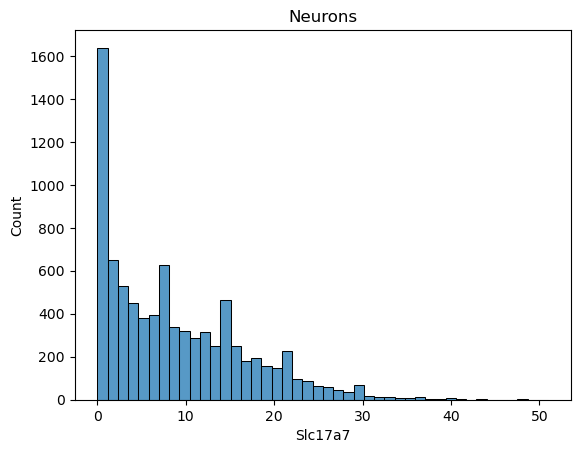

In [75]:
fig, ax = plt.subplots()
sns.histplot(data=cortical_data.query('Type!="non-neuronal"'), x='Slc17a7', ax=ax)
ax.set_title('Neurons')

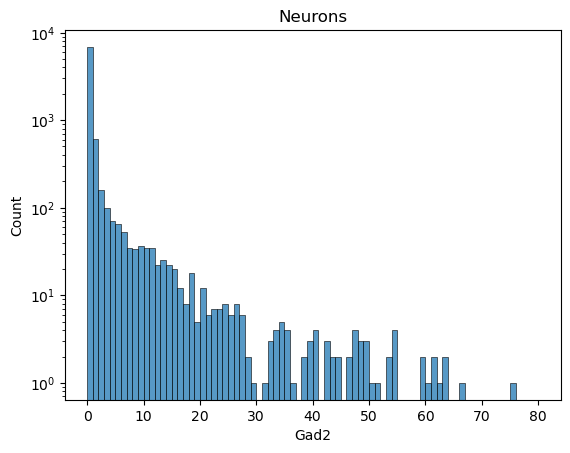

In [78]:
fig, ax = plt.subplots()
sns.histplot(data=cortical_data.query('Type!="non-neuronal"'), x='Gad2', ax=ax, bins=np.arange(0,81))
ax.set_title('Neurons')
ax.set_yscale('log')